# Seaborn Versus Matplotlib



Here is an example of a simple random-walk plot in MATPLOTLIB, using its classic plot formatting and colors.

source= https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')  #The style package adds support for easy-to-switch plotting "styles" 
                         #various styles are shown here- https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
                        #try ggplot
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Create some data
rng = np.random.RandomState(0)  #This generator is considered frozen and will have no further improvements. It is guaranteed to produce the same values
                                #These all depend on Box-Muller normals or inverse CDF exponentials or gammas. This class should only be used if it is essential to have randoms that are identical to what would have been produced by previous versions of NumPy.
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)  #numpy.cumsum() function is used when we want to compute the cumulative sum of array elements over a given axis

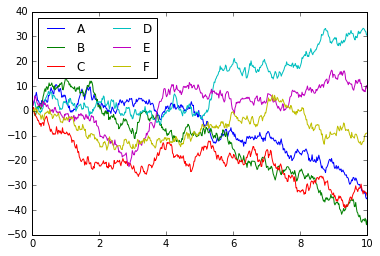

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');  #try loc=1/2/3/4 and also 0 which estimates correct position of legend on its own

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a look at how it works with Seaborn. As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output. We can set the style by calling Seaborn's set() method. By convention, Seaborn is imported as sns

In [4]:
import seaborn as sns
sns.set()

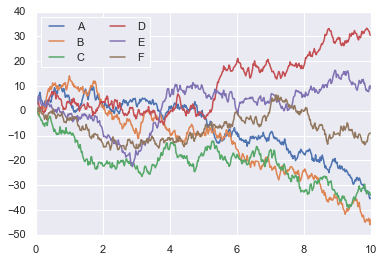

In [5]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following could be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

In [9]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
#data

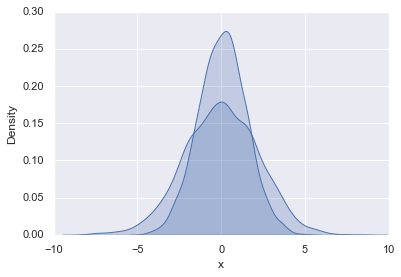

In [10]:
for col in 'xy':  #xy means plotting for x&y in same graph
    sns.kdeplot(data[col], shade=True)  #we can get a smooth estimate of the distribution using a kernel density estimation (kde)

C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


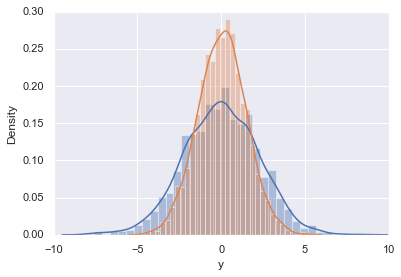

In [11]:
#Histograms and KDE can be combined using distplot
sns.distplot(data['x'])
sns.distplot(data['y']);

# Pair Plots

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


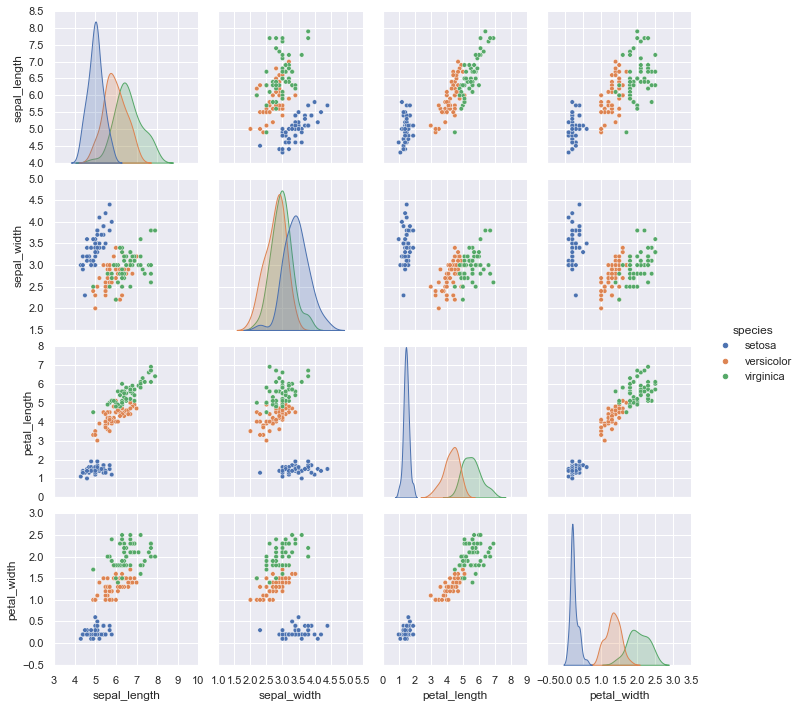

In [13]:
#Visualizing the multidimensional relationships among the samples
sns.pairplot(iris, hue='species', size=2.5);

# Histograms

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
tips.count

<bound method DataFrame.count of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

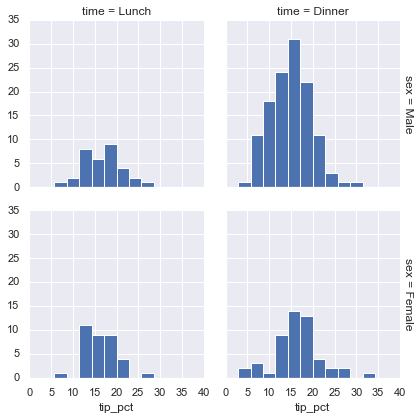

In [16]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

#The basic workflow is to initialize the FacetGrid object with the dataset and the variables that are used to structure the grid. 
#Then one or more plotting functions can be applied to each subset by calling FacetGrid.map() or FacetGrid.map_dataframe(). 
#Finally, the plot can be tweaked with other methods to do things like change the axis labels, use different ticks, or add a legend.

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)  #This class (facetgrid) maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the datase
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

# Factor Plots

C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


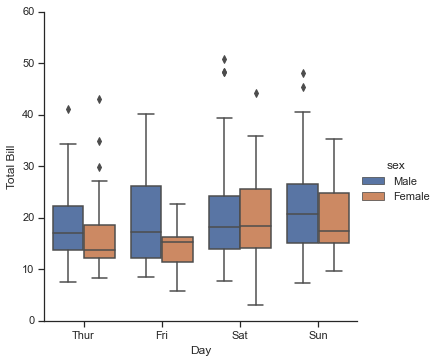

In [19]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")  #box=boxplot #Options are: “point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”.
    g.set_axis_labels("Day", "Total Bill");

Similar to the pairplot we saw earlier, we can use sns.jointplot to show the joint distribution between different datasets, along with the associated marginal distributions:

C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


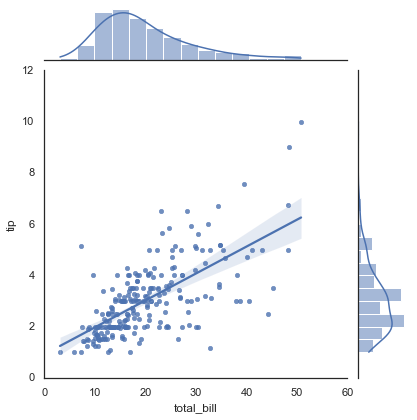

In [23]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='reg')  #kind =options are “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” 

# Bar plot

In [24]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


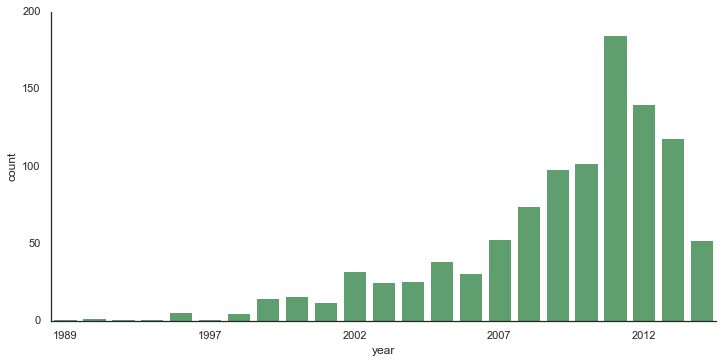

In [26]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='g')
    g.set_xticklabels(step=5)

C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


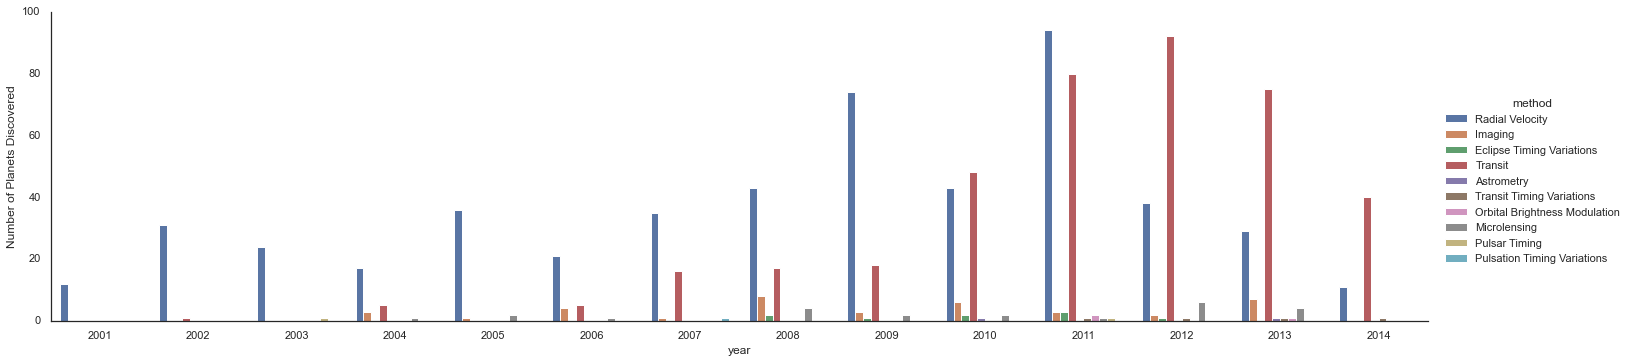

In [27]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))   #hue : (optional)This parameter take column name for colour encoding
                                                                #aspect : (optional) This parameter take float value, Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches
    g.set_ylabels('Number of Planets Discovered')